In [190]:
import pandas as pd
import pandas_datareader as pdr
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
## FORECASTING SALES

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load the data and create the data variables
dataset = pd.read_csv('sale_sample.csv')

x = dataset.iloc[:,1:4]
y = dataset['Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Create and fit the model for prediction
lin = LinearRegression()
lin.fit(x_train, y_train)
y_pred = lin.predict(x_test)

## Create Coefficients
coef = lin.coef_
components = pd.DataFrame(zip(x.columns, coef), columns = ['component', 'value'])
components = components.append({'component':'intercept','value':lin.intercept_}, ignore_index = True)

## Predicted return
def product_coef(product_name, coef, value):
    total, days, prev_date = 0, 0, None
    for row in dataset[product_name]:
        total += (row * coef)
    for date in dataset['Date']:
        if date != prev_date:
            days += 1
        prev_date = date
    return total/days

## Calculates coeficients
def predicted_return(electronic_value, clothing_value, produce_value):
    electronic_coef = product_coef(components['component'][0], components['value'][0], 0)
    clothing_coef = product_coef(components['component'][1], components['value'][1], 1)
    produce_coef = product_coef(components['component'][2], components['value'][2], 2)
    intercept = components['value'][3]
    formula = intercept + (electronic_coef * electronic_value) + (clothing_coef * clothing_value) + (produce_coef  * produce_value)
    if electronic_value == 0 or clothing_value == 0 or produce_value == 0 or intercept == 0:
        return 0
    else:
        return formula

## Slider interactives from products
electronic_value, clothing_value, produce_value, formula = 0, 0, 0, 0

electronic_slider = widgets.IntSlider(value= electronic_value, 
                                      min=-0, max=1000, description='Electronics')
clothing_slider = widgets.IntSlider(value = clothing_value, 
                                    min=-0, max=1000, description='Clothings')
produce_slider = widgets.IntSlider(value= produce_value, 
                                   min=-0, max=1000, description='Produces')

## BAR CHART
## CURRENT VS PREDICTIVE SALES
def update_predicted_sale(electronic_slider, clothing_slider, produce_slider):
    formula = predicted_return(electronic_slider, clothing_slider, produce_slider)
    ## Monthly product sales
    electronic_sales, clothing_sales, produce_sales = 0, 0, 0
    for sales in  dataset['Electronics']:
        electronic_sales += sales
    for sales in dataset['Clothing']:
        clothing_sales += sales
    for sales in dataset['Produce']:
        produce_sales += sales
    monthly_sale = electronic_sales + produce_sales + produce_sales
    ## Bar chart data
    current_sales = monthly_sale
    predictive_sales = formula
    X = np.arange(1)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar('Current Month Sales', monthly_sale, color = 'b', width = 0.35, align = 'center')
    ax.bar('Predictive Month Sales', predictive_sales, color = 'g', width = 0.35, align = 'center')
    ax.set_ylabel('Sales')
    ax.set_title('Current Sales vs Predicted Sales')
    ax.legend(labels=['Current', 'Predictive'])

    ## Displays predictive and current sales, and bar chart
    display(widgets.HBox([widgets.Label(value ="Current Month Sales: ${:0.2f}".format(monthly_sale))]))
    display(widgets.HBox([widgets.Label(value ="Future Predicted Sales: ${:0.2f}".format(predictive_sales))]))
    plt.show()
    
predicted_return(electronic_value, clothing_value, produce_value) 
display(widgets.HBox([widgets.Label(value ="Electronic per dollar returns: {:0.4f}".format(components['value'][0]))]))
display(widgets.HBox([widgets.Label(value ="Clothing per dollar returns: {:0.4f}".format(components['value'][1]))]))
display(widgets.HBox([widgets.Label(value ="Produce per dollar returns: {:0.4f}".format(components['value'][2]))]))

widgets.interactive(update_predicted_sale, electronic_slider = electronic_slider, 
                   clothing_slider = clothing_slider, produce_slider = produce_slider)


interactive(children=(IntSlider(value=0, description='Electronics', max=1000), IntSlider(value=0, description=…

In [192]:
## PIE CHART

## reads table from sale_sample.csv table
dataset = pd.read_csv('sale_sample.csv')

## Monthly product sales
electronic_sales, clothing_sales, produce_sales = 0, 0, 0
for sales in  dataset['Electronics']:
    electronic_sales += sales
for sales in dataset['Clothing']:
    clothing_sales += sales
for sales in dataset['Produce']:
    produce_sales += sales

monthly_sale = electronic_sales + produce_sales + produce_sales


## Updates pie chart from sliders
def update_Pie():
    total.clear() 
    total.extend([electronic_sales, clothing_sales, produce_sales])
    products = ['Electronics', 'Clothing', 'Produce']
    color = ['r','g','b']
    plt.pie(total, labels = products, 
            colors = color, shadow = True, startangle = 90, explode = (0,0,0), autopct = '%1.2f%%')
    plt.legend()
    display(widgets.HBox([widgets.Label(value ="Monthly Product Sales")]))
    plt.show()
    

total = []    
widgets.interactive(update_Pie)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

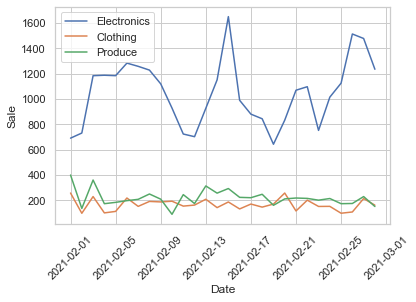

In [193]:
## LINE CHART

## reads table from sale_sample.csv table\
d_parser = lambda x: pd.datetime.strptime
dataset = pd.read_csv('sale_sample.csv', parse_dates = ['Date'], )


stock = ['Electronics', 'Clothing', 'Produce']

new_dataset = dataset.unstack().reset_index()
new_dataset.columns = ['Value', 'Category', 'Date']
new_dataset = new_dataset[['Value', 'Date', 'Category']]

## columns for new data set
def columns():
    count, price, prev_date = 0, 0, None, 
    stock, date_column, product_column, price_column = ['Electronics', 'Clothing', 'Produce'], [], [], []
    while count <= 2:
        # creates date and product lists for table
        inc = 0
        for date in dataset['Date']:
            if date != prev_date:
                date_column.append(date)
                product_column.append(stock[count])  
                # calculates price from stock per day
                price = 0
                for day in dataset['Date']:
                    if date == day:
                        price += dataset[stock[count]][inc]     
                        inc += 1
                price_column.append(price)
            prev_date = date
        count += 1
    return date_column, product_column, price_column

month_sales = {'Date': columns()[0],
        'Product': columns()[1],
        'Sale': columns()[2]
        }

df = pd.DataFrame(month_sales, columns = ['Date', 'Product', 'Sale'])

sns.set(style="whitegrid")
ax = sns.lineplot(data = df, x = 'Date', y = 'Sale', hue = 'Product')
ax.tick_params(axis='x', rotation=45)
plt.legend(loc='upper left')
plt.show()